In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import smooth
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('input_ginis_ssp5.csv', skiprows=1,
                 names=['ISO3', 'year'] + ['sSSP{}'.format(i) for i in range(1, 6)]
                 + ['mSSP{}'.format(i) for i in range(1, 6)] + ['std'])

In [3]:
df.head()

,ISO3,year,sSSP1,sSSP2,sSSP3,sSSP4,sSSP5,mSSP1,mSSP2,mSSP3,mSSP4,mSSP5,std
0,AUT,2011,26.074261,26.069490,26.068783,26.066082,26.072668,26.106634,26.100088,26.096939,26.093916,26.104774,12.422885
1,AUT,2012,26.737581,26.804142,26.882103,26.910206,26.734562,26.634933,26.647060,26.669598,26.672831,26.633261,12.472048
2,AUT,2013,26.663389,26.807251,26.972239,27.031157,26.658817,26.592031,26.627455,26.680357,26.689861,26.590401,12.477098
3,AUT,2014,26.715080,26.942604,27.202990,27.292898,26.708954,26.708775,26.772722,26.860851,26.876833,26.707188,12.494031
4,AUT,2015,26.758347,27.075573,27.439514,27.560543,26.750635,26.822889,26.920372,27.048410,27.071028,26.821312,12.513879


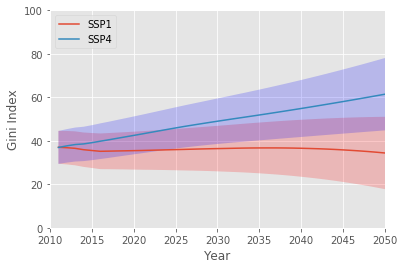

In [4]:
data = df.set_index('ISO3').loc['IND'].set_index('year')
data['ssp1u'] = data['mSSP1'] + data['std']
data['ssp1l'] = data['mSSP1'] - data['std']
data['ssp4u'] = data['mSSP4'] + data['std']
data['ssp4l'] = data['mSSP4'] - data['std']

plt.plot(data.index, data['mSSP1'], label='SSP1')
plt.plot(data.index, data['mSSP4'], label='SSP4')
plt.fill_between(data.index, data.ssp1u, data.ssp1l, facecolor='red', alpha=.2)
plt.fill_between(data.index, data.ssp4u, data.ssp4l, facecolor='blue', alpha=.2)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Gini Index')
plt.xlim(2010, 2050)
plt.ylim(0, 100)
plt.savefig('india.png')

In [5]:
newdf = df.pivot('ISO3', 'year').copy()
singles = ['sSSP{}'.format(i) for i in range(1, 6)]
multis = ['mSSP{}'.format(i) for i in range(1, 6)]
for ssp in singles + multis:
    print(ssp)
    for iso, row in newdf[ssp].iterrows():
        newdf[ssp].loc[iso] = smooth.adj_below(newdf[ssp].loc[iso])
        newdf[ssp].loc[iso] = smooth.adj_above(newdf[ssp].loc[iso])

sSSP1


/home/gidden/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


sSSP2
sSSP3
sSSP4
sSSP5
mSSP1
mSSP2
mSSP3
mSSP4
mSSP5


In [9]:
assert((newdf[singles + multis] < 65).all(axis=0).all())
assert((newdf[singles + multis] > 15).all(axis=0).all())

In [10]:
newdf.head()

sSSP1                                                         \
year       2011       2012       2013       2014       2015       2016   
ISO3                                                                     
AUT   26.074261  26.737581  26.663389  26.715080  26.758347  26.782522   
BEL   28.349951  27.892925  27.666283  27.669338  27.500769  27.337940   
BGR   36.120251  35.952427  35.914841  35.817028  35.779800  35.726013   
BLR   25.279303  25.569714  25.520451  25.355469  25.220890  25.115076   
BOL   55.876625  55.509064  55.266956  55.004005  54.729530  54.316517   

                                                    ...            std  \
year       2017       2018       2019       2020    ...           2091   
ISO3                                                ...                  
AUT   26.837683  26.851339  26.824461  26.787796    ...      18.769209   
BEL   27.265703  27.214397  27.118797  27.014381    ...      18.602146   
BGR   35.867489  36.125523  36.346970  36.556721    ...      21.781092   
BLR   25.215233  25.340946  25.435713  25.522364    ...      28.954624   
BOL   54.118164  53.882065  53.587025  53.252861    ...      55.235725   

                                                                        \
year       2092       2093       2094       2095       2096       2097   
ISO3                                                                     
AUT   18.885561  19.003380  19.122669  19.243446  19.364525  19.480001   
BEL   18.676170  18.751102  18.826954  18.903734  18.981035  19.055580   
BGR   21.954464  22.129799  22.307121  22.486452  22.667057  22.846842   
BLR   29.261127  29.570614  29.883127  30.198700  30.515543  30.833250   
BOL   56.245533  57.265652  58.296093  59.336899  60.382179  61.436722   

                                       
year       2098       2099       2100  
ISO3                                   
AUT   19.596928  19.715317  19.835178  
BEL   19.131083  19.207556  19.285015  
BGR   23.028675  23.212584  23.398588  
BLR   31.154068  31.478033  31.805185  
BOL   62.501503  63.576584  64.661995  

[5 rows x 990 columns]

In [8]:
newdf.T.to_csv('adjusted_multi_single.csv')